<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/12_3_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:00


## 12.3 Gradient Descent

### 12.3.1 One-Dimensional Gradient Descent

In [3]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [4]:
def f(x):       # Objective function
  return x **2

def f_grad(x):  # Gradient (derivative) of the objective function
  return 2 * x

In [ ]:
def gd(eta, f_grad):
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(float(x))
  print(f'epoch 10, x: {x:f}')
  return results

results = gd(0.2, f_grad)
results

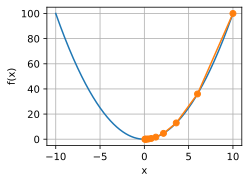

In [7]:
def show_trace(results, f):
  n = max(abs(min(results)), abs(max(results)))
  f_line = torch.arange(-n, n, 0.01)
  d2l.set_figsize()
  d2l.plot([f_line, results], [[f(x) for x in f_line],
                               [f(x) for x in results]], 'x', 'f(x)', 
           fmts=['-', '-o'])
  
show_trace(results, f)

#### Learning Rate

epoch 10, x: 3.486784


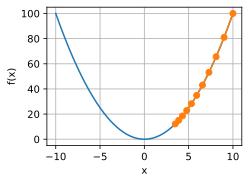

In [9]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


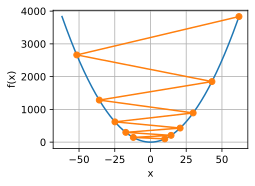

In [10]:
show_trace(gd(1.1, f_grad), f)

#### Local Minima

In [11]:
c = torch.tensor(0.15 * np.pi)

def f(x):   # Objective function
  return x * torch.cos(c * x)

def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x)

epoch 10, x: -1.528166


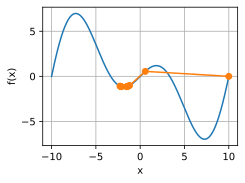

In [12]:
show_trace(gd(2, f_grad), f)

### 12.3.2 Multivariate Gradient Descent

In [13]:
def train_2d(trainer, steps=28, f_grad=None):
  x1, x2, s1, s2 = -5, -2, 0, 0
  results = [(x1, x2)]
  for i in range(steps):
    if f_grad:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
    else:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
    results.append((x1, x2))
  print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2): f}')
  return results